(784,)


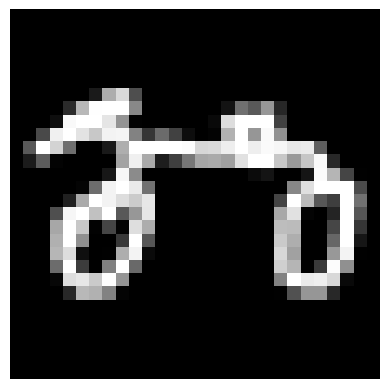

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy')

print(np.shape(array_data[16]))

# Extract the first image
first_image = array_data[16].reshape(28, 28)  # Assuming each image is 28x28 pixels (adjust as per your data)

# Display the first image
plt.imshow(first_image, cmap='gray')
plt.axis('off')  # Optional: turn off axis numbers and ticks

plt.savefig('first_image.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths for the 10 classes
file_paths = [
    'C:/demo/classfier_cnn/data/The Eiffel Tower.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_basketball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_baseball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bathtub.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_apple.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bat.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_alarm clock.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_airplane.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_book.npy'
]

# Function to load and preprocess data
def load_data(file_paths, num_samples=5000):
    data = []
    labels = []
    for idx, file_path in enumerate(file_paths):
        array_data = np.load(file_path)
        # Get the first num_samples samples
        first_samples = array_data[:num_samples]
        data.append(first_samples)
        # Create labels for these samples
        labels.append(np.full((num_samples,), idx))
    return np.vstack(data), np.concatenate(labels)

# Load the data
data, labels = load_data(file_paths)

# Normalize the data
data = data.astype('float32') / 255.0

# Reshape the data if necessary (e.g., if the images are 28x28 pixels)
data = data.reshape(-1, 28, 28)  # Assuming the images are 28x28 pixels and grayscale

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (40000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (40000,)
y_test shape: (10000,)


In [4]:
# Define the class labels
class_labels = [
    'The Eiffel Tower',
    'full_numpy_bitmap_basketball',
    'full_numpy_bitmap_baseball',
    'full_numpy_bitmap_bathtub',
    'full_numpy_bitmap_bicycle',
    'full_numpy_bitmap_apple',
    'full_numpy_bitmap_bat',
    'full_numpy_bitmap_alarm clock',
    'full_numpy_bitmap_airplane',
    'full_numpy_bitmap_book'
]

# Create the dictionary
class_dict = {i: label for i, label in enumerate(class_labels)}

# Print the dictionary
print(class_dict)

{0: 'The Eiffel Tower', 1: 'full_numpy_bitmap_basketball', 2: 'full_numpy_bitmap_baseball', 3: 'full_numpy_bitmap_bathtub', 4: 'full_numpy_bitmap_bicycle', 5: 'full_numpy_bitmap_apple', 6: 'full_numpy_bitmap_bat', 7: 'full_numpy_bitmap_alarm clock', 8: 'full_numpy_bitmap_airplane', 9: 'full_numpy_bitmap_book'}


In [31]:
X_test_reshaped = np.reshape(X_test, (10000,  28, 28))
X_train_reshaped = np.reshape(X_train, (40000,  28, 28))

# Print the shape after reshaping
print("X_train shape after reshaping:", X_train_reshaped.shape)
print("X_test shape after reshaping:", X_test_reshaped.shape)

X_train shape after reshaping: (40000, 28, 28)
X_test shape after reshaping: (10000, 28, 28)


In [32]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assume X_train, y_train, X_test, y_test are already defined as numpy arrays or tensors

# Convert data to tensors if they are numpy arrays
if isinstance(X_train_reshaped, np.ndarray):
    X_train = torch.tensor(X_train, dtype=torch.float32) #dtype=torch.float32
if isinstance(y_train, np.ndarray):
    y_train = torch.tensor(y_train, dtype=torch.int64)
if isinstance(X_test_reshaped, np.ndarray):
    X_test = torch.tensor(X_test, dtype=torch.float32)
if isinstance(y_test, np.ndarray):
    y_test = torch.tensor(y_test, dtype=torch.int64)

# Combine data and labels into TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_dataset, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)


In [33]:
for X, y in train_dataloader:
    print(X.shape)
    break

torch.Size([32, 28, 28])


In [34]:
np.shape(X_train[5])

torch.Size([28, 28])

torch.Size([28, 28])


RuntimeError: Numpy is not available

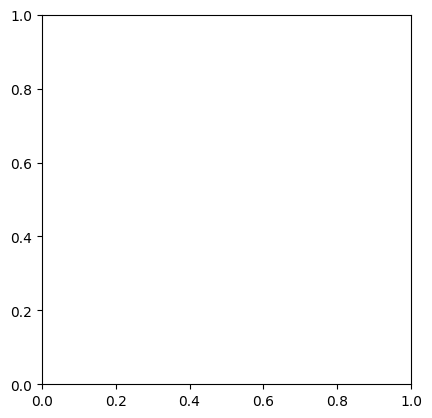

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import torch
print(np.shape(X_train[5]))

image_to_plot = X_train[5]  # Assuming you want to plot the second image (index 1)

# Plot the image directly using PyTorch and matplotlib
plt.imshow(image_to_plot, cmap='gray')  # Squeeze along the channel dimension
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()

In [25]:
import matplotlib.pyplot as plt
import torch

print(image_to_plot.shape)  # Verify the shape

# Convert PyTorch tensor to numpy array
image_np = image_to_plot.numpy()

# Plot the image
plt.imshow(image_np, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

torch.Size([28, 28])


RuntimeError: Numpy is not available

In [35]:
print(np.shape(first_image))
print(np.shape(image_to_plot))

(28, 28)
torch.Size([28, 28])


In [37]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001A2C4FBE4B0>, <torch.utils.data.dataloader.DataLoader object at 0x000001A2C4DC4CE0>)
Length of train dataloader: 1250 batches of 32
Length of test dataloader: 313 batches of 32


In [38]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 28, 28]), torch.Size([32]))

In [40]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import numpy as np

class DoodleClassModel04(nn.Module):
    def __init__(self, input_channels: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Flatten(),
            nn.Linear(in_features=128*3*3, out_features=256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.4),
            nn.Linear(in_features=256, out_features=output_shape)
        )
    
    def forward(self, x):
        # Add channel dimension if it's missing
        if x.dim() == 3:
            x = x.unsqueeze(1)
        return self.layer_stack(x)
# Define accuracy function
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return (correct / len(y_true)) * 100

torch.manual_seed(42)

# Check if GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model_2 = DoodleClassModel04(input_channels=1, output_shape=len(class_dict)) # For grayscale images
model_2.to(device)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, verbose=True)

# Data loading (assuming train_dataloader and test_dataloader are defined)
epochs = 30

# Training loop
for epoch in tqdm(range(epochs)):
    model_2.train()
    train_loss = 0
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        y_pred = model_2(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    train_loss /= len(train_dataloader)
    
    # Evaluation
    model_2.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            test_pred = model_2(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
    
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    scheduler.step(test_loss)  # Update the scheduler

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

print("Training Complete")


  3%|▎         | 1/30 [00:06<02:57,  6.12s/it]

Epoch 1/30 | Train Loss: 0.6859 | Test Loss: 0.4436 | Test Acc: 87.22%


  7%|▋         | 2/30 [00:09<01:58,  4.23s/it]

Epoch 2/30 | Train Loss: 0.4626 | Test Loss: 0.3827 | Test Acc: 89.34%


 10%|█         | 3/30 [00:11<01:35,  3.54s/it]

Epoch 3/30 | Train Loss: 0.4117 | Test Loss: 0.3460 | Test Acc: 89.49%


 13%|█▎        | 4/30 [00:14<01:23,  3.20s/it]

Epoch 4/30 | Train Loss: 0.3870 | Test Loss: 0.3425 | Test Acc: 90.72%


 17%|█▋        | 5/30 [00:17<01:15,  3.01s/it]

Epoch 5/30 | Train Loss: 0.3605 | Test Loss: 0.3979 | Test Acc: 90.58%


 20%|██        | 6/30 [00:19<01:09,  2.89s/it]

Epoch 6/30 | Train Loss: 0.3515 | Test Loss: 0.3404 | Test Acc: 91.20%


 23%|██▎       | 7/30 [00:22<01:04,  2.83s/it]

Epoch 7/30 | Train Loss: 0.3279 | Test Loss: 0.3864 | Test Acc: 91.47%


 27%|██▋       | 8/30 [00:25<01:01,  2.78s/it]

Epoch 8/30 | Train Loss: 0.3211 | Test Loss: 0.2815 | Test Acc: 91.04%


 30%|███       | 9/30 [00:27<00:57,  2.74s/it]

Epoch 9/30 | Train Loss: 0.3174 | Test Loss: 0.2567 | Test Acc: 91.84%


 33%|███▎      | 10/30 [00:30<00:54,  2.72s/it]

Epoch 10/30 | Train Loss: 0.3000 | Test Loss: 0.2606 | Test Acc: 92.04%


 37%|███▋      | 11/30 [00:33<00:51,  2.70s/it]

Epoch 11/30 | Train Loss: 0.2941 | Test Loss: 0.2704 | Test Acc: 92.02%


 40%|████      | 12/30 [00:35<00:48,  2.71s/it]

Epoch 12/30 | Train Loss: 0.2935 | Test Loss: 0.2499 | Test Acc: 92.11%


 43%|████▎     | 13/30 [00:38<00:45,  2.69s/it]

Epoch 13/30 | Train Loss: 0.2826 | Test Loss: 0.2442 | Test Acc: 92.40%


 47%|████▋     | 14/30 [00:41<00:42,  2.69s/it]

Epoch 14/30 | Train Loss: 0.2738 | Test Loss: 0.2452 | Test Acc: 92.31%


 50%|█████     | 15/30 [00:43<00:40,  2.67s/it]

Epoch 15/30 | Train Loss: 0.2736 | Test Loss: 0.2424 | Test Acc: 92.46%


 53%|█████▎    | 16/30 [00:46<00:37,  2.68s/it]

Epoch 16/30 | Train Loss: 0.2700 | Test Loss: 0.2407 | Test Acc: 92.52%


 57%|█████▋    | 17/30 [00:49<00:34,  2.68s/it]

Epoch 17/30 | Train Loss: 0.2605 | Test Loss: 0.2389 | Test Acc: 92.40%


 60%|██████    | 18/30 [00:51<00:32,  2.68s/it]

Epoch 18/30 | Train Loss: 0.2619 | Test Loss: 0.2429 | Test Acc: 92.59%


 63%|██████▎   | 19/30 [00:54<00:29,  2.68s/it]

Epoch 19/30 | Train Loss: 0.2544 | Test Loss: 0.2360 | Test Acc: 92.54%


 67%|██████▋   | 20/30 [00:57<00:26,  2.68s/it]

Epoch 20/30 | Train Loss: 0.2536 | Test Loss: 0.2481 | Test Acc: 92.10%


 70%|███████   | 21/30 [00:59<00:24,  2.69s/it]

Epoch 21/30 | Train Loss: 0.2486 | Test Loss: 0.2389 | Test Acc: 92.60%


 73%|███████▎  | 22/30 [01:02<00:21,  2.68s/it]

Epoch 22/30 | Train Loss: 0.2427 | Test Loss: 0.2387 | Test Acc: 92.57%


 77%|███████▋  | 23/30 [01:05<00:18,  2.68s/it]

Epoch 23/30 | Train Loss: 0.2436 | Test Loss: 0.2401 | Test Acc: 92.54%


 80%|████████  | 24/30 [01:08<00:16,  2.70s/it]

Epoch 24/30 | Train Loss: 0.2386 | Test Loss: 0.2310 | Test Acc: 92.97%


 83%|████████▎ | 25/30 [01:10<00:13,  2.70s/it]

Epoch 25/30 | Train Loss: 0.2366 | Test Loss: 0.2351 | Test Acc: 92.71%


 87%|████████▋ | 26/30 [01:13<00:10,  2.70s/it]

Epoch 26/30 | Train Loss: 0.2371 | Test Loss: 0.2323 | Test Acc: 92.83%


 90%|█████████ | 27/30 [01:16<00:08,  2.70s/it]

Epoch 27/30 | Train Loss: 0.2301 | Test Loss: 0.2310 | Test Acc: 92.70%


 93%|█████████▎| 28/30 [01:18<00:05,  2.70s/it]

Epoch 28/30 | Train Loss: 0.2310 | Test Loss: 0.2324 | Test Acc: 92.66%


 97%|█████████▋| 29/30 [01:21<00:02,  2.69s/it]

Epoch 29/30 | Train Loss: 0.2242 | Test Loss: 0.2355 | Test Acc: 92.54%


100%|██████████| 30/30 [01:24<00:00,  2.81s/it]

Epoch 30/30 | Train Loss: 0.2253 | Test Loss: 0.2349 | Test Acc: 92.89%
Training Complete


In [54]:
import torch
import numpy as np

def preprocess_sample_image(image_array):
    # Normalize the image
    image_array = image_array.astype('float32') / 255.0
    
    # Reshape the image to (1, 1, 28, 28) if it's a single image
    image_array = np.reshape(image_array, ( 28, 28))
    
    # Convert to torch tensor
    image_tensor = torch.tensor(image_array, dtype=torch.float32)
    
    # Check if CUDA (GPU) is available and move tensor to CUDA device
    if torch.cuda.is_available():
        device = torch.device("cuda")
        image_tensor = image_tensor.to(device)
    
    return image_tensor

(28, 28, 3, 1)


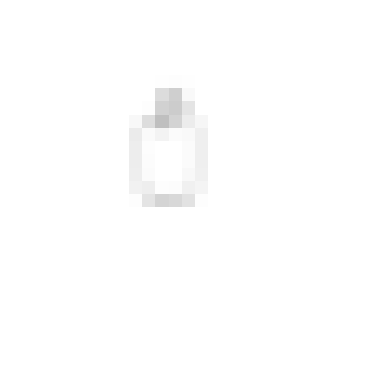

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image
image = Image.open('C:/test001/ttt/cnn_classifier/iamges/apple.jpg')

# Resize the image to 28x28
resized_image = image.resize((28, 28))

# Convert the image to a NumPy array
image_array = np.array(resized_image)

# Ensure the image has the shape (28, 28, 1)
# For grayscale, add a new axis to make it (28, 28, 1)
image_array = np.expand_dims(image_array, axis=-1)

print(np.shape(image_array))
# Display the image
plt.imshow(image_array.squeeze(), cmap='gray')
plt.axis('off')  # Optional: to hide the axis
plt.show()

In [56]:
# Preprocess the sample image
sample_image_tensor = preprocess_sample_image(image_array)#(input_tensor)

# Make a prediction with the loaded model
with torch.no_grad():
    output = model_2(sample_image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

# Print the predicted class

print(f"Predicted class label: {class_dict[predicted_class]}")
print(f"Predicted class index: {predicted_class}")

ValueError: cannot reshape array of size 2352 into shape (28,28)

In [13]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

class_labels = [
    'The Eiffel Tower',
    'full_numpy_bitmap_basketball',
    'full_numpy_bitmap_baseball',
    'full_numpy_bitmap_bathtub',
    'full_numpy_bitmap_bicycle',
    'full_numpy_bitmap_apple',
    'full_numpy_bitmap_bat',
    'full_numpy_bitmap_alarm clock',
    'full_numpy_bitmap_airplane',
    'full_numpy_bitmap_book'
]

class_dict = {i: label for i, label in enumerate(class_labels)}

# Define the model
class DoodleClassModel04(nn.Module):
    def __init__(self, input_channels: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),
            nn.Flatten(),
            nn.Linear(in_features=128*3*3, out_features=256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.4),
            nn.Linear(in_features=256, out_features=output_shape)
        )
    
    def forward(self, x):
        if x.dim() == 3:
            x = x.unsqueeze(1)
        return self.layer_stack(x)

# Initialize and load the model
input_channels = 1
output_shape = 10
model = DoodleClassModel04(input_channels=input_channels, output_shape=output_shape)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_2 = model.to(device)
model_2.load_state_dict(torch.load('C:/test001/ttt/cnn_classifier/ml_model/cnn_model_2307.pth', map_location=device))
model_2.eval()

DoodleClassModel04(
  (layer_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.4, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.4, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.4, inplace=False)
    (15): Flatten(start_dim=1, end_d

In [14]:
model_2

DoodleClassModel04(
  (layer_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.4, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.4, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.4, inplace=False)
    (15): Flatten(start_dim=1, end_d

In [15]:
import torch
import numpy as np

def preprocess_sample_image(image_array):
    # Check the shape of the input array
    if image_array.ndim == 3 and image_array.shape[2] == 3:
        # If it's a color image, convert to grayscale
        image_array = np.mean(image_array, axis=2)
    
    # Ensure the image is 28x28
    if image_array.shape != (28, 28):
        raise ValueError(f"Expected image shape (28, 28), got {image_array.shape}")
    
    # Normalize the image
    image_array = image_array.astype('float32') / 255.0
    
    # Convert to torch tensor
    image_tensor = torch.tensor(image_array, dtype=torch.float32)
    
    # Add batch and channel dimensions
    image_tensor = image_tensor.unsqueeze(0).unsqueeze(0)  # Shape becomes (1, 1, 28, 28)
    
    # Check if CUDA (GPU) is available and move tensor to CUDA device
    if torch.cuda.is_available():
        device = torch.device("cuda")
        image_tensor = image_tensor.to(device)
    
    return image_tensor

# # Load and preprocess the image
# image = Image.open('C:/test001/ttt/cnn_classifier/iamges/apple.jpg')

# # Resize the image to 28x28
# resized_image = image.resize((28, 28))

# # Convert the image to a NumPy array
# image_array = np.array(resized_image)

# sample_image_tensor = preprocess_sample_image(image_array)

array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy')

# Extract the first image
image_array = array_data[16].reshape(28, 28)
sample_image_tensor = preprocess_sample_image(image_array)

# Make a prediction with the loaded model
with torch.no_grad():
    output = model_2(sample_image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

# Print the predicted class
print(f"Predicted class label: {class_dict[predicted_class]}")
print(f"Predicted class index: {predicted_class}")

Predicted class label: full_numpy_bitmap_bicycle
Predicted class index: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy')

# Extract the first image
first_image = array_data[16].reshape(28, 28)  # Assuming each image is 28x28 pixels (adjust as per your data)

# Display the first image
plt.imshow(first_image, cmap='gray')
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()

In [63]:
torch.save(model_2.state_dict(), 'cnn_model_2307.pth')

In [67]:
import coremltools as ct
import numpy as np

# Define the new model architecture
input_features = ct.models.datatypes.Array(28, 28)
output_features = ct.models.datatypes.Dictionary(ct.models.datatypes.String)

builder = ct.models.neural_network.NeuralNetworkBuilder(
    input_features=[('image', input_features)],
    output_features=[('category softmax scores', output_features), ('category', ct.models.datatypes.String)])

# Add layers to the model
builder.add_convolution(
    name='conv1', 
    kernel_channels=1, 
    output_channels=32, 
    height=3, 
    width=3, 
    stride_height=1, 
    stride_width=1, 
    border_mode='valid', 
    groups=1, 
    W=np.random.rand(32, 1, 3, 3),  # Random weights for example
    b=np.random.rand(32),  # Random biases for example
    has_bias=True, 
    input_name='image', 
    output_name='conv1_output'
)
builder.add_activation(name='relu1', non_linearity='RELU', input_name='conv1_output', output_name='relu1_output')
builder.add_batchnorm(
    name='batchnorm1', 
    channels=32, 
    gamma=np.random.rand(32), 
    beta=np.random.rand(32), 
    mean=np.random.rand(32), 
    variance=np.random.rand(32), 
    input_name='relu1_output', 
    output_name='batchnorm1_output'
)
builder.add_pooling(name='pool1', height=2, width=2, stride_height=2, stride_width=2, layer_type='MAX', input_name='batchnorm1_output', output_name='pool1_output' , padding_type='VALID')

builder.add_convolution(
    name='conv2', 
    kernel_channels=32, 
    output_channels=64, 
    height=3, 
    width=3, 
    stride_height=1, 
    stride_width=1, 
    border_mode='valid', 
    groups=1, 
    W=np.random.rand(64, 32, 3, 3),  # Random weights for example
    b=np.random.rand(64),  # Random biases for example
    has_bias=True, 
    input_name='dropout1_output', 
    output_name='conv2_output'
)
builder.add_activation(name='relu2', non_linearity='RELU', input_name='conv2_output', output_name='relu2_output')
builder.add_batchnorm(
    name='batchnorm2', 
    channels=64, 
    gamma=np.random.rand(64), 
    beta=np.random.rand(64), 
    mean=np.random.rand(64), 
    variance=np.random.rand(64), 
    input_name='relu2_output', 
    output_name='batchnorm2_output'
)
builder.add_pooling(name='pool2', height=2, width=2, stride_height=2, stride_width=2, layer_type='MAX', input_name='batchnorm2_output', output_name='pool2_output' , padding_type='VALID')

builder.add_convolution(
    name='conv3', 
    kernel_channels=64, 
    output_channels=128, 
    height=3, 
    width=3, 
    stride_height=1, 
    stride_width=1, 
    border_mode='valid', 
    groups=1, 
    W=np.random.rand(128, 64, 3, 3),  # Random weights for example
    b=np.random.rand(128),  # Random biases for example
    has_bias=True, 
    input_name='dropout2_output', 
    output_name='conv3_output'
)
builder.add_activation(name='relu3', non_linearity='RELU', input_name='conv3_output', output_name='relu3_output')
builder.add_batchnorm(
    name='batchnorm3', 
    channels=128, 
    gamma=np.random.rand(128), 
    beta=np.random.rand(128), 
    mean=np.random.rand(128), 
    variance=np.random.rand(128), 
    input_name='relu3_output', 
    output_name='batchnorm3_output'
)
builder.add_pooling(name='pool3', height=2, width=2, stride_height=2, stride_width=2, layer_type='MAX', input_name='batchnorm3_output', output_name='pool3_output' , padding_type='VALID')
builder.add_flatten(name='flatten', input_name='dropout3_output', output_name='flatten_output',mode=1)

builder.add_inner_product(
    name='fc1', 
    input_channels=128*3*3, 
    output_channels=256, 
    W=np.random.rand(256, 128*3*3),  # Random weights for example
    b=np.random.rand(256),  # Random biases for example
    has_bias=True, 
    input_name='flatten_output', 
    output_name='fc1_output'
)
builder.add_activation(name='relu4', non_linearity='RELU', input_name='fc1_output', output_name='relu4_output')
builder.add_batchnorm(
    name='batchnorm4', 
    channels=256, 
    gamma=np.random.rand(256), 
    beta=np.random.rand(256), 
    mean=np.random.rand(256), 
    variance=np.random.rand(256), 
    input_name='relu4_output', 
    output_name='batchnorm4_output'
)

builder.add_inner_product(
    name='fc2', 
    input_channels=256, 
    output_channels=len(class_dict), 
    W=np.random.rand(len(class_dict), 256),  # Random weights for example
    b=np.random.rand(len(class_dict)),  # Random biases for example
    has_bias=True, 
    input_name='dropout4_output', 
    output_name='fc2_output'
)

# Save the model
model = ct.models.MLModel(builder.spec)
model.save('new_model02.mlmodel')

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

(126527, 784)


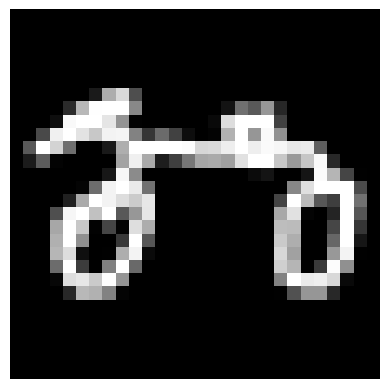

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy')

print(np.shape(array_data))

# Extract the first image
first_image = array_data[16].reshape(28, 28)  # Assuming each image is 28x28 pixels (adjust as per your data)

# Display the first image
plt.imshow(first_image, cmap='gray')
plt.axis('off')  # Optional: turn off axis numbers and ticks

plt.savefig('first_image.png', bbox_inches='tight', pad_inches=0)



In [22]:
np.shape(array_data)

(126527, 784)

In [ ]:
    'C:/demo/classfier_cnn/data/The Eiffel Tower.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_basketball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_baseball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bathtub.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_apple.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bat.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_alarm clock.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_airplane.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_book.npy'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data
array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_ant.npy')

# Check the shape of the data
print(np.shape(array_data))  # Should output (126527, 784)

# Ensure the output directory exists
output_dir = 'C:/test001/ttt/data/ant'
os.makedirs(output_dir, exist_ok=True)

# Define the number of images to save
num_images_to_save = 10000

# Save images
for idx in range(min(num_images_to_save, len(array_data))):
    img = array_data[idx]
    
    # Reshape the image to 28x28 pixels
    image_reshaped = img.reshape(28, 28)
    
    # Display the image
    plt.imshow(image_reshaped, cmap='gray')
    plt.axis('off')  # Optional: turn off axis numbers and ticks
    
    # Save the image
    output_path = os.path.join(output_dir, f'image_{idx}.png')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    
    # Clear the plot to avoid overlap
    plt.clf()

print(f"Saved {min(num_images_to_save, len(array_data))} images to {output_dir}")

(124612, 784)
Saved 10000 images to C:/test001/ttt/data/ant


<Figure size 640x480 with 0 Axes>